In [1]:
from __future__ import annotations
from utils_to_build_QAOAAnsatz import *
import pprint

pprint.pprint(info)

{1: {'exact_covers': ['010101', '001100'],
     'mec': '001100',
     'subsets': [{1, 3, 4, 5, 6, 7, 8, 9, 11, 12},
                 {2, 11, 4, 5},
                 {1, 2, 4, 5, 6, 11},
                 {3, 7, 8, 9, 10, 12},
                 {2, 3, 4, 6, 7, 8, 9, 10, 11, 12},
                 {1, 6}]},
 2: {'exact_covers': ['101110', '100011'],
     'mec': '100011',
     'subsets': [{8, 9, 11},
                 {2, 4, 5, 6, 7, 8, 9, 10, 11, 12},
                 {1, 10, 12, 7},
                 {2, 3},
                 {4, 5, 6},
                 {1, 2, 3, 7, 10, 12}]},
 3: {'exact_covers': ['001111', '101001'],
     'mec': '101001',
     'subsets': [{2, 10, 4, 5},
                 {1, 3, 4, 5, 6, 7, 9, 10, 11, 12},
                 {3, 7, 8, 9, 11, 12},
                 {2, 10},
                 {4, 5},
                 {1, 6}]},
 4: {'exact_covers': ['110001', '001001'],
     'mec': '001001',
     'subsets': [{3, 4, 12, 7},
                 {5, 6},
                 {3, 4, 5, 6, 7, 12

In [2]:
# Random instances
folder_list_random = ["random_parameters_2025-09-12@14h56m00s", # p=3 k=1 
                      "random_parameters_2025-09-12@12h30m08s", # p=3 LEC
                      "random_parameters_2025-09-12@13h44m51s", # p=3 LEC-1
                      "random_parameters_2025-09-16@08h28m21s", # p=4 k=1 
                      "random_parameters_2025-09-10@18h01m06s", # p=4 LEC
                      "random_parameters_2025-09-21@19h13m58s"  # p=4 LEC-1
                      ]

# Wang instances
folder_list_wang = ["random_parameters_2025-09-24@10h30m53s", # p=3 k=1 
                    "random_parameters_2025-09-24@08h09m40s", # p=3 LEC
                    "random_parameters_2025-09-23@20h39m11s", # p=3 LEC-1
                    "random_parameters_2025-09-14@10h46m48s", # p=4 k=1 
                    "random_parameters_2025-09-13@16h32m19s", # p=4 LEC
                    "random_parameters_2025-09-13@13h11m55s"  # p=4 LEC-1
                    ]

labels = ["p=3 k=1",
          "p=3 LEC",
          "p=3 LEC-1",
          "p=4 k=1",
          "p=4 LEC",
          "p=4 LEC-1"
          ]

In [3]:
def extract_percentage_from_file(f, d):
    n, instance, init_name, p, random_attempts, k = define_parameters_from_filename(d, verbose=False)
    U, subsets_dict = define_instance(n, instance, verbose=False)
    EXACT_COVERS = find_spectrum(U, subsets_dict, n, k=1)[4]
    MEC = min(EXACT_COVERS, key=lambda s: s.count('1'))  # MEC is the minimal energy cover
    
    # Load CSV data into pandas DataFrame and process it.
    df = pd.read_csv(f, dtype=str).set_index('states')
    df = df.astype(float).fillna(0.0)
    
    # Read metadata to extract the attempt that reached the best result.
    with open(d, 'r') as dd:
        for line in dd:
            if 'Attempt that reached the best result with' in line:
                string = line.split('#')[1]
                i_best = string.split(' ')[0]  # Best attempt index

    # Construct the column name for the best result.
    column_best = f'counts_p{p}_{i_best}of{random_attempts}'
    
    # Get the percentage version of df, with average and range columns
    percentage = get_percentage_df(df, 
                                    cols_to_keep=[column_best], 
                                    sorting_col=column_best)
    
    
    return MEC, percentage


def find_mec_percentage(f, d):
    MEC, percentage = extract_percentage_from_file(f, d)
    tmp = percentage.copy()
    tmp["states"] = tmp.index
    tmp = tmp[tmp['states'] == MEC]  
    
    if tmp.empty:
        mec_percentage = 0
    else:
        mec_percentage = tmp.iloc[0][tmp.columns[0]]
        
    return mec_percentage

def build_vector_of_mec_percentages(files, data):
    mec_percentages = []
    for f, d in zip(files, data):
        mec_percentage = find_mec_percentage(f, d)
        mec_percentages.append(mec_percentage)

    return mec_percentages, np.mean(mec_percentages)


def find_best_succ_probs_between_LEC_and_LEC_1(mec_percentages_LEC, mec_percentages_LEC_1):   
    best_succ_probs_between_LEC_and_LEC_1 = {}
    for probs_LEC, probs_LEC_1, label in zip(mec_percentages_LEC, mec_percentages_LEC_1, ["p=3", "p=4"]):
        best_succ_probs_fixed_label = []
        for instance, (prob_LEC, prob_LEC_1) in enumerate(zip(probs_LEC, probs_LEC_1)):
            max_prob = max(prob_LEC, prob_LEC_1)
            print(f"The best for label = {label}, instance = {instance} is max_prob = {max_prob} %")
            best_succ_probs_fixed_label.append(max_prob)     
        best_succ_probs_between_LEC_and_LEC_1[label] = best_succ_probs_fixed_label
    # pprint.pprint(best_succ_probs_between_LEC_and_LEC_1)
    return best_succ_probs_between_LEC_and_LEC_1


### Wang

##### Plot raw results.

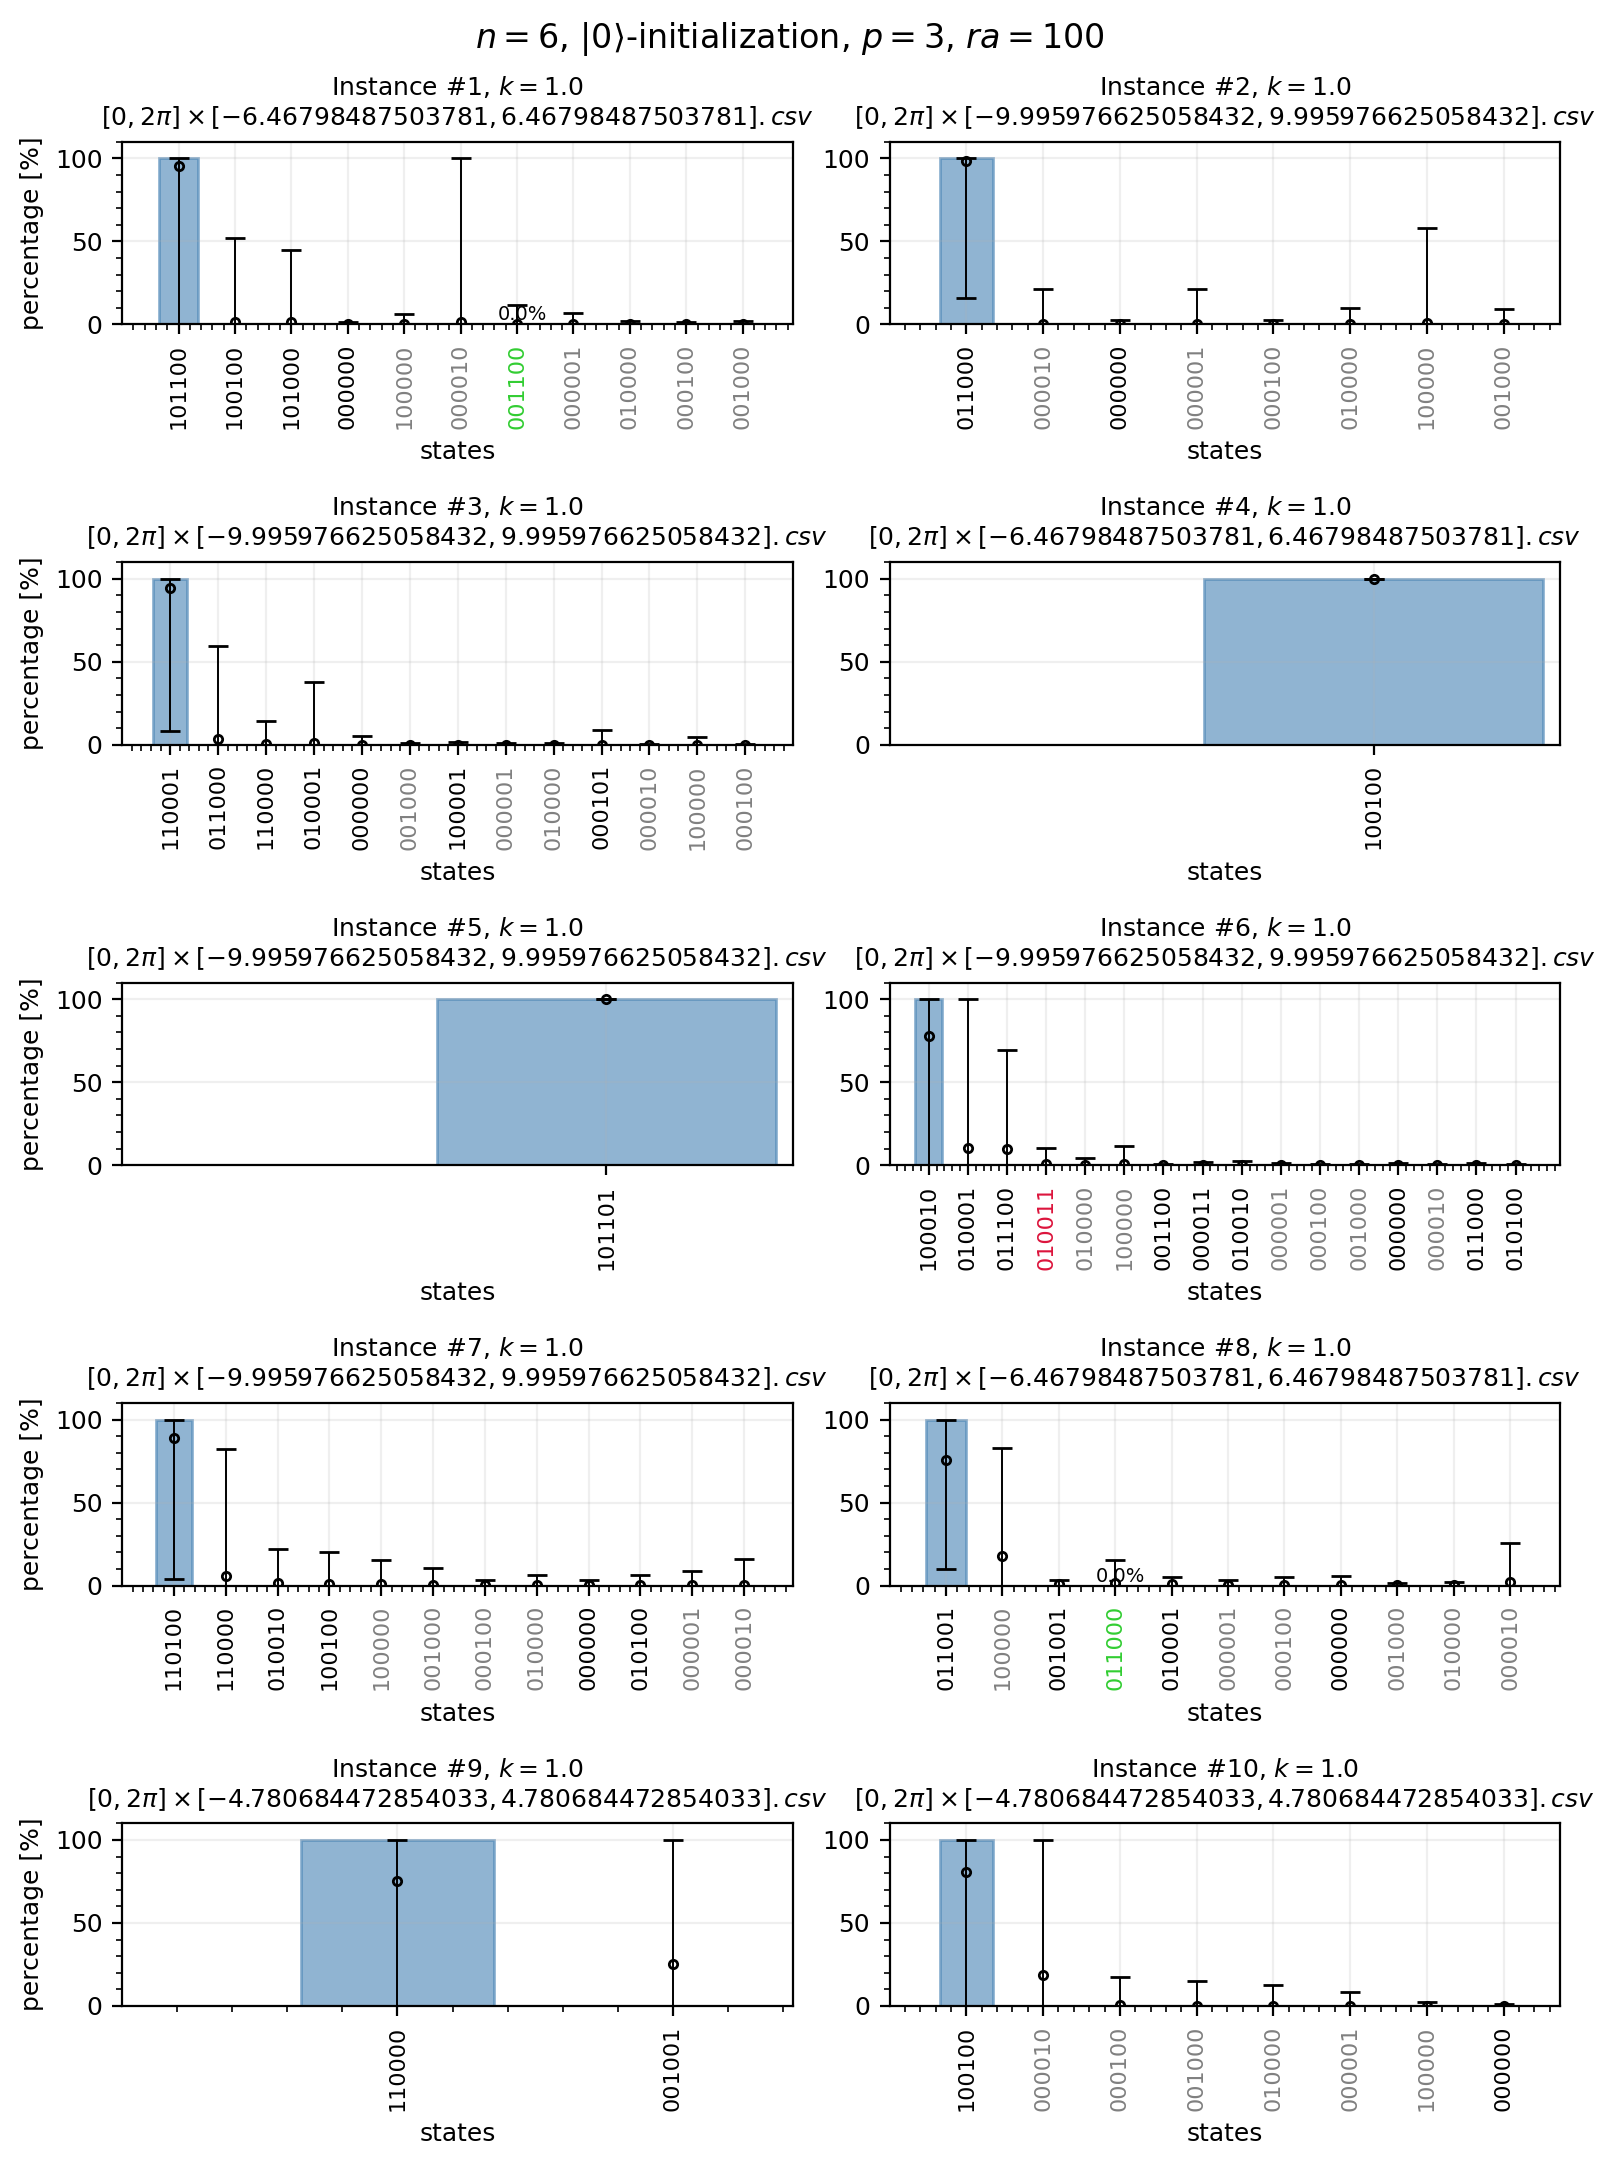

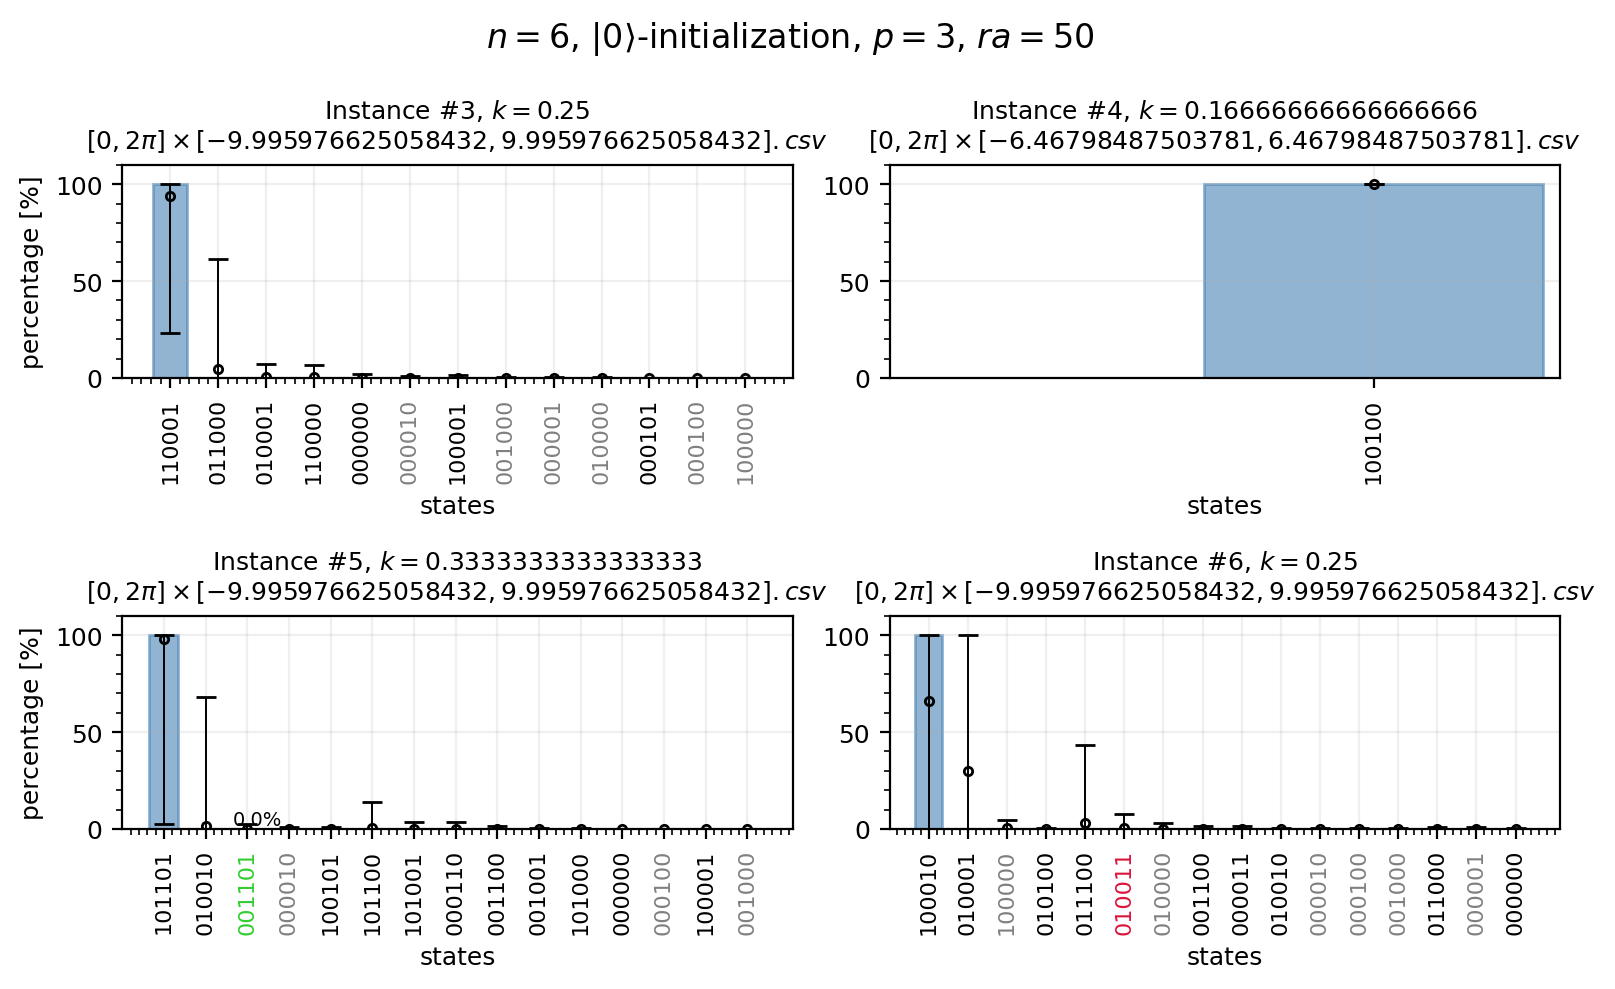

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x732dc323cca0>>
Traceback (most recent call last):
  File "/home/auroramugnai/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x732dc323cca0>>
Traceback (most recent call last):
  File "/home/auroramugnai/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x732dc323cca0>>
Traceback (most recent call last):
  File "/home/auroramugnai/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 775, in _c

KeyboardInterrupt: 

In [5]:
for folder in folder_list_wang:
    # Find the files that contain every string in 'substrings'.
    FILENAME_list, DATA_FILENAME_list = find_files_containing_string(path= f"./{folder}/")

    # Get the number of files collected.
    num_files = len(FILENAME_list)

    if num_files>1:
        plot_list_of_files(FILENAME_list, DATA_FILENAME_list,
                           colorchosen="steelblue", alpha=0.6,
                           init_name="all1",
                           dont_show_in_title=["i", "k"],
                           dont_show_in_titles=["n", "p", "ra", "init"],
                           figsize=(8,num_files+1),
                           dpi=200, N=9) # figsize=(10, 13), dpi=300, N=12 for latex figures
    else:
        plot_file(FILENAME_list[0], DATA_FILENAME_list[0],
                  colorchosen='indigo', alpha=0.4,
                  dont_show_in_title = [],
                  figsize=(10,4), dpi=200, N=10)

In [ ]:
# plot_each_attempt_from_folder(folder_path)

##### Compute the success probability vectors.
Per Wang considero solo le 4 istanze problematiche.

In [ ]:
#********** Wang **********
mec_mean_vec = []
mec_percentages_LEC = []
mec_percentages_LEC_1 = []

for folder, label in zip(folder_list_wang, labels):
    files, data = find_files_containing_string(path= f"./{folder}/")
    
    # these files only have 3--6 instances
    if label == "p=3 LEC" or label == "p=4 LEC":
        mec_percentages, mec_mean = build_vector_of_mec_percentages(files, data)
        
    else: # these files have 10 instances, we must select only the 3--6 instances
        mec_percentages, _ = build_vector_of_mec_percentages(files, data)
        mec_percentages = mec_percentages[2:6]
        mec_mean = np.mean(mec_percentages)
    mec_mean_vec.append(mec_mean)
    
    if "LEC" in label:
        if "-1" in label:
            mec_percentages_LEC_1.append(mec_percentages)
        else:
            mec_percentages_LEC.append(mec_percentages)
            
    print(f"♦ {label} ♦")
    print(f"   folder '{folder}':\n   mec_percentages = {mec_percentages} %, \n   mean: {mec_mean} %")
print("\nmec_mean_perc_vec = ", mec_mean_vec)

print("\nmec_mean_perc_vec = ", mec_mean_vec)
print("mec_percentages_LEC = ", mec_percentages_LEC)
print("mec_percentages_LEC_1 = ", mec_percentages_LEC_1)

In [ ]:
best_succ_probs_between_LEC_and_LEC_1 = find_best_succ_probs_between_LEC_and_LEC_1(mec_percentages_LEC, 
                                                                                   mec_percentages_LEC_1)

In [ ]:
p3 = best_succ_probs_between_LEC_and_LEC_1["p=3"]
p4 = best_succ_probs_between_LEC_and_LEC_1["p=4"]
mean_p4 = np.mean(p4)
mean_p3 = np.mean(p3)
print("The Mean (over the instances) Best Success Probability for p=3 is", mean_p3)
print("The Mean (over the instances) Best Success Probability for p=4 is", mean_p4)

### Random instances.

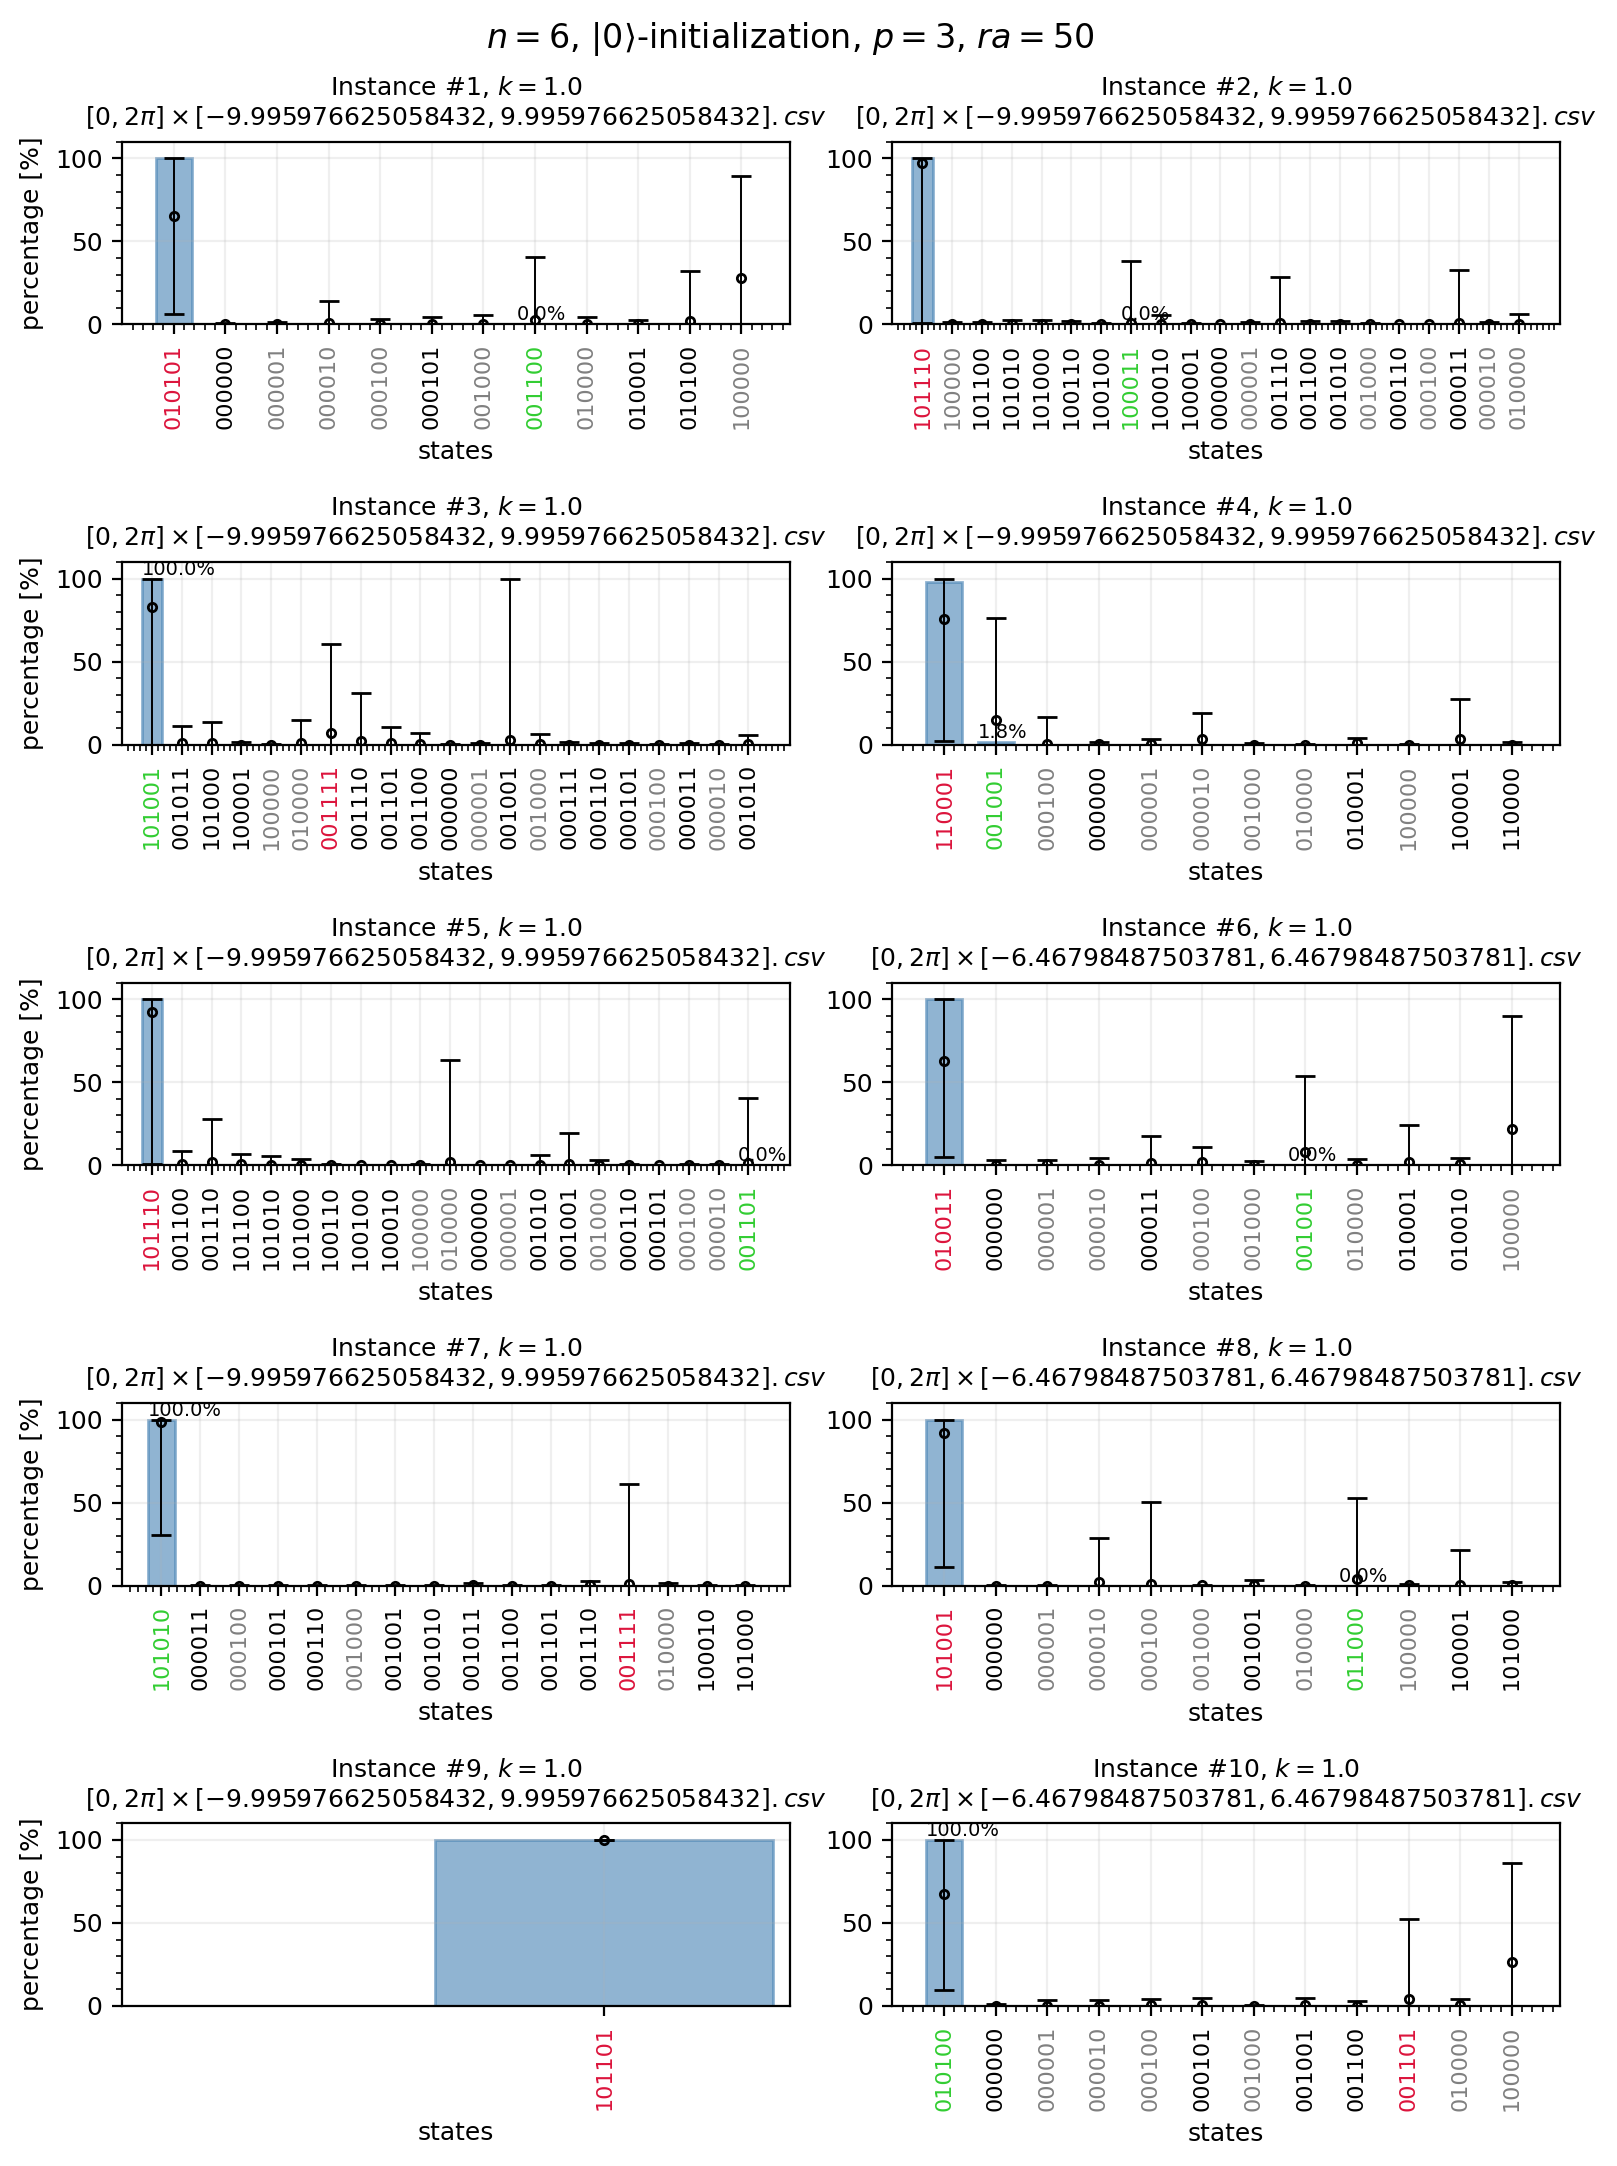

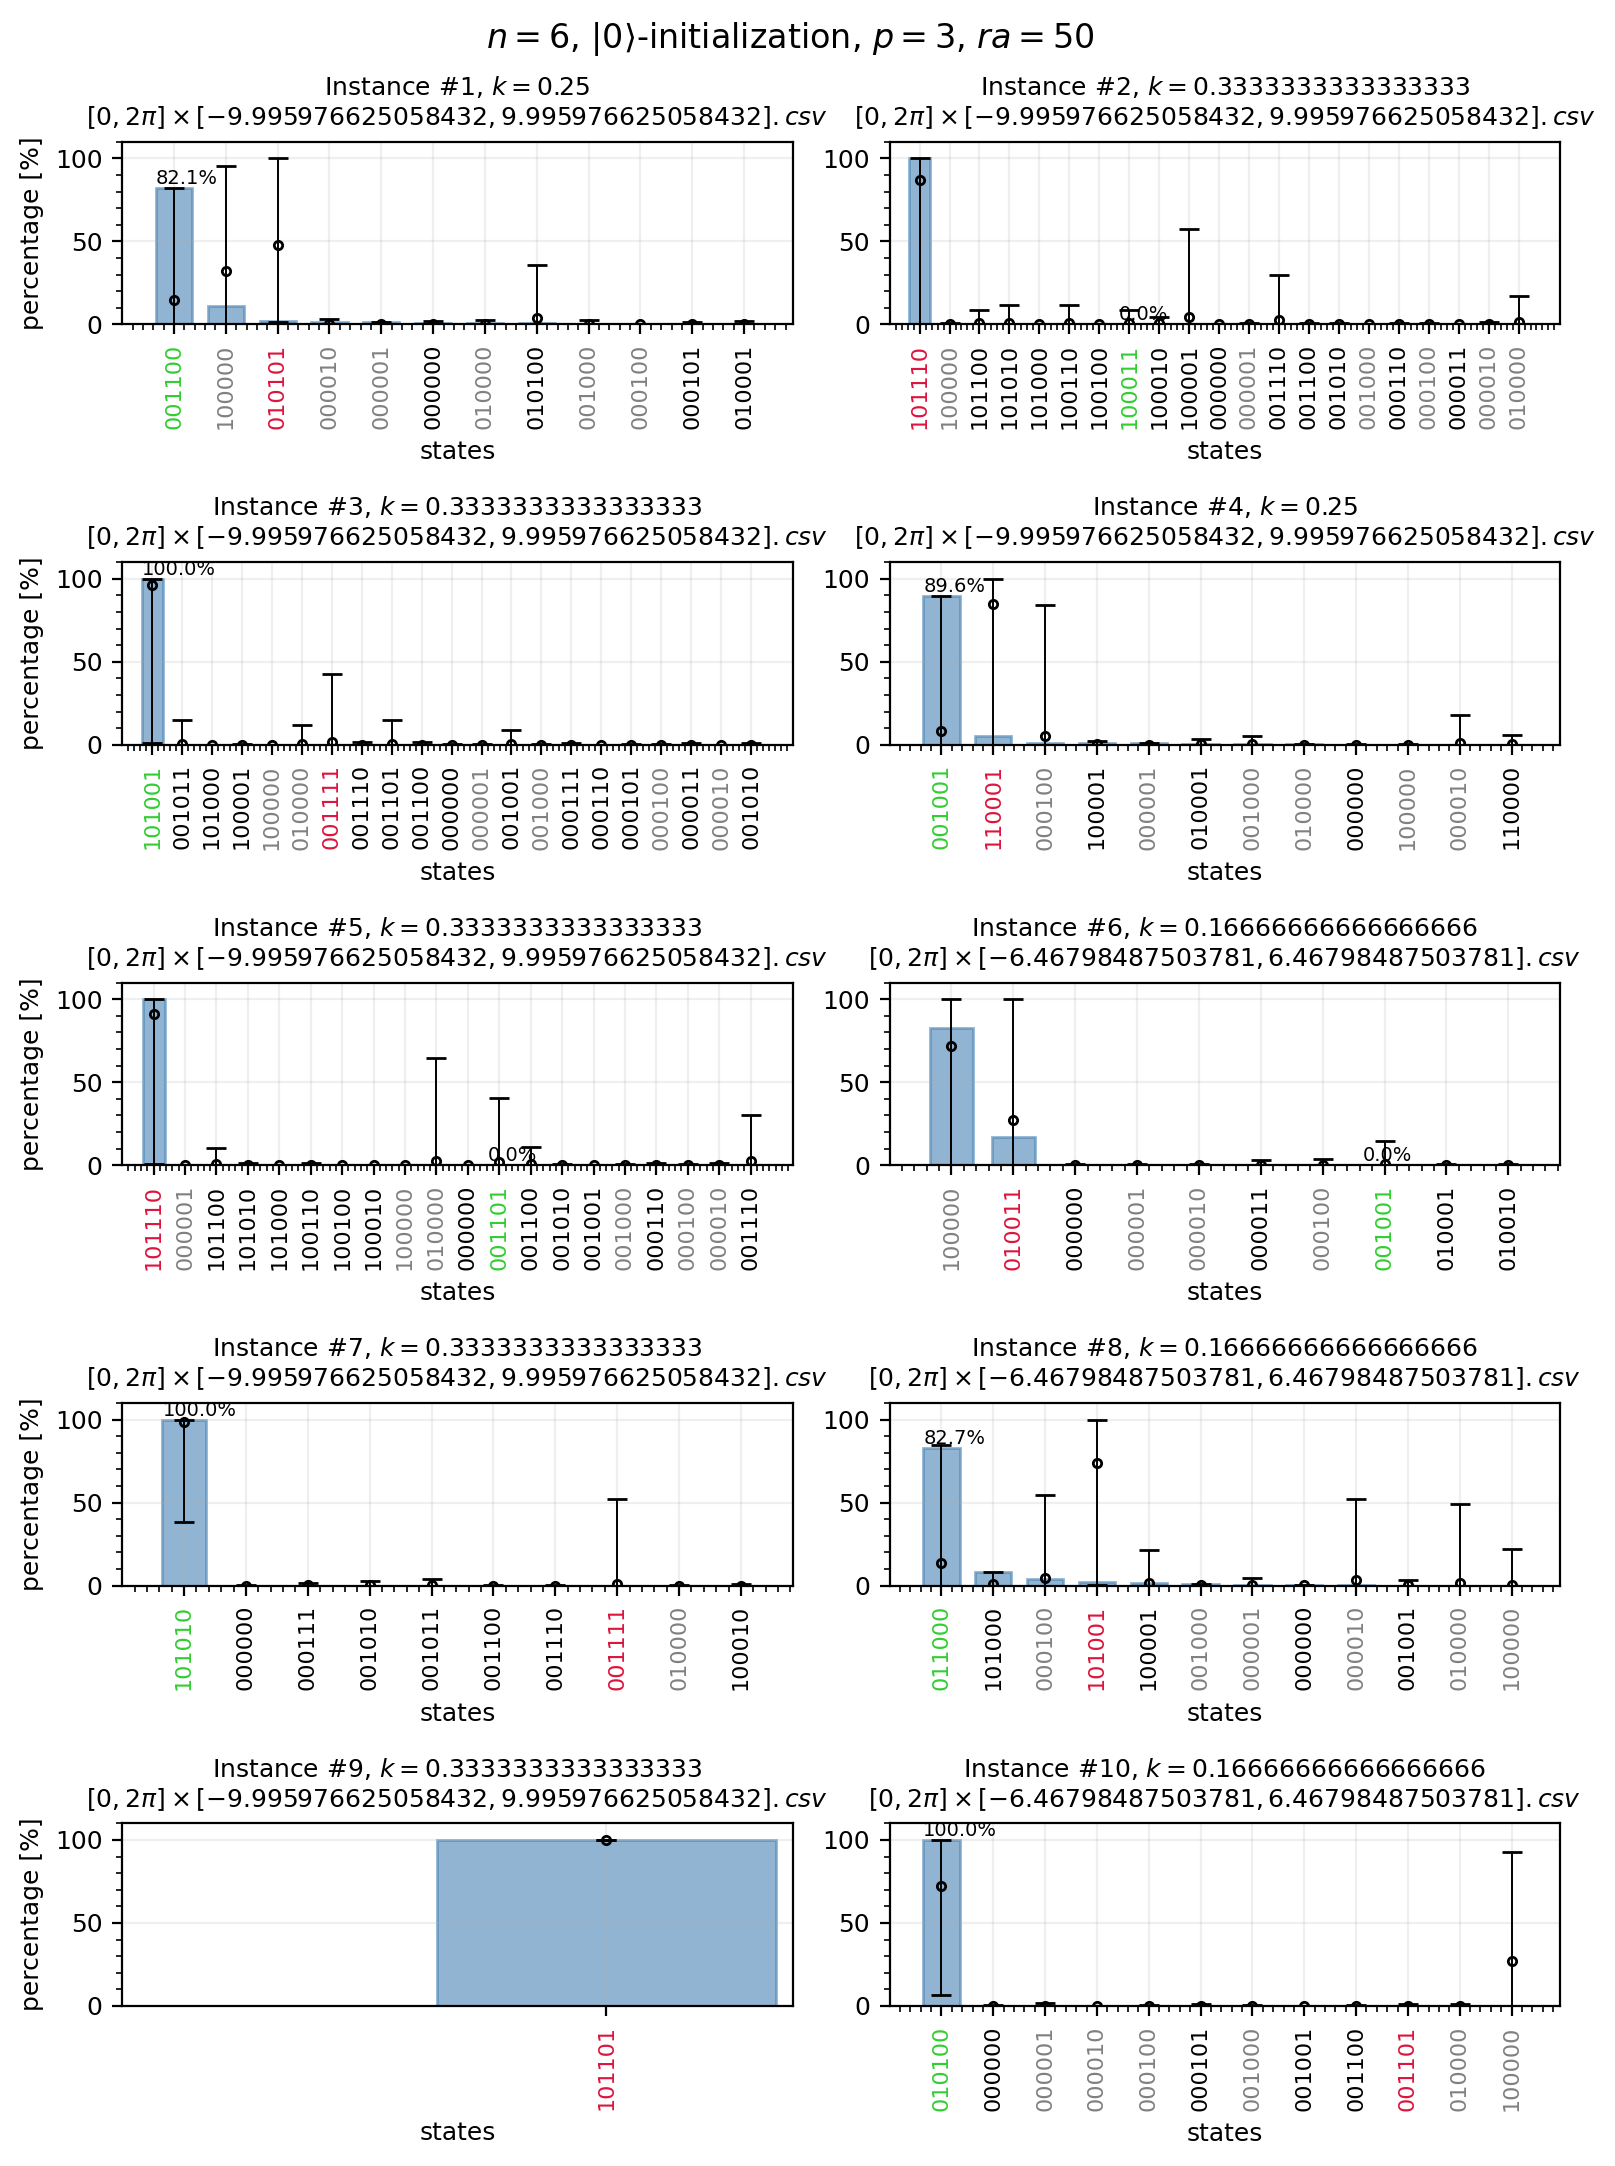

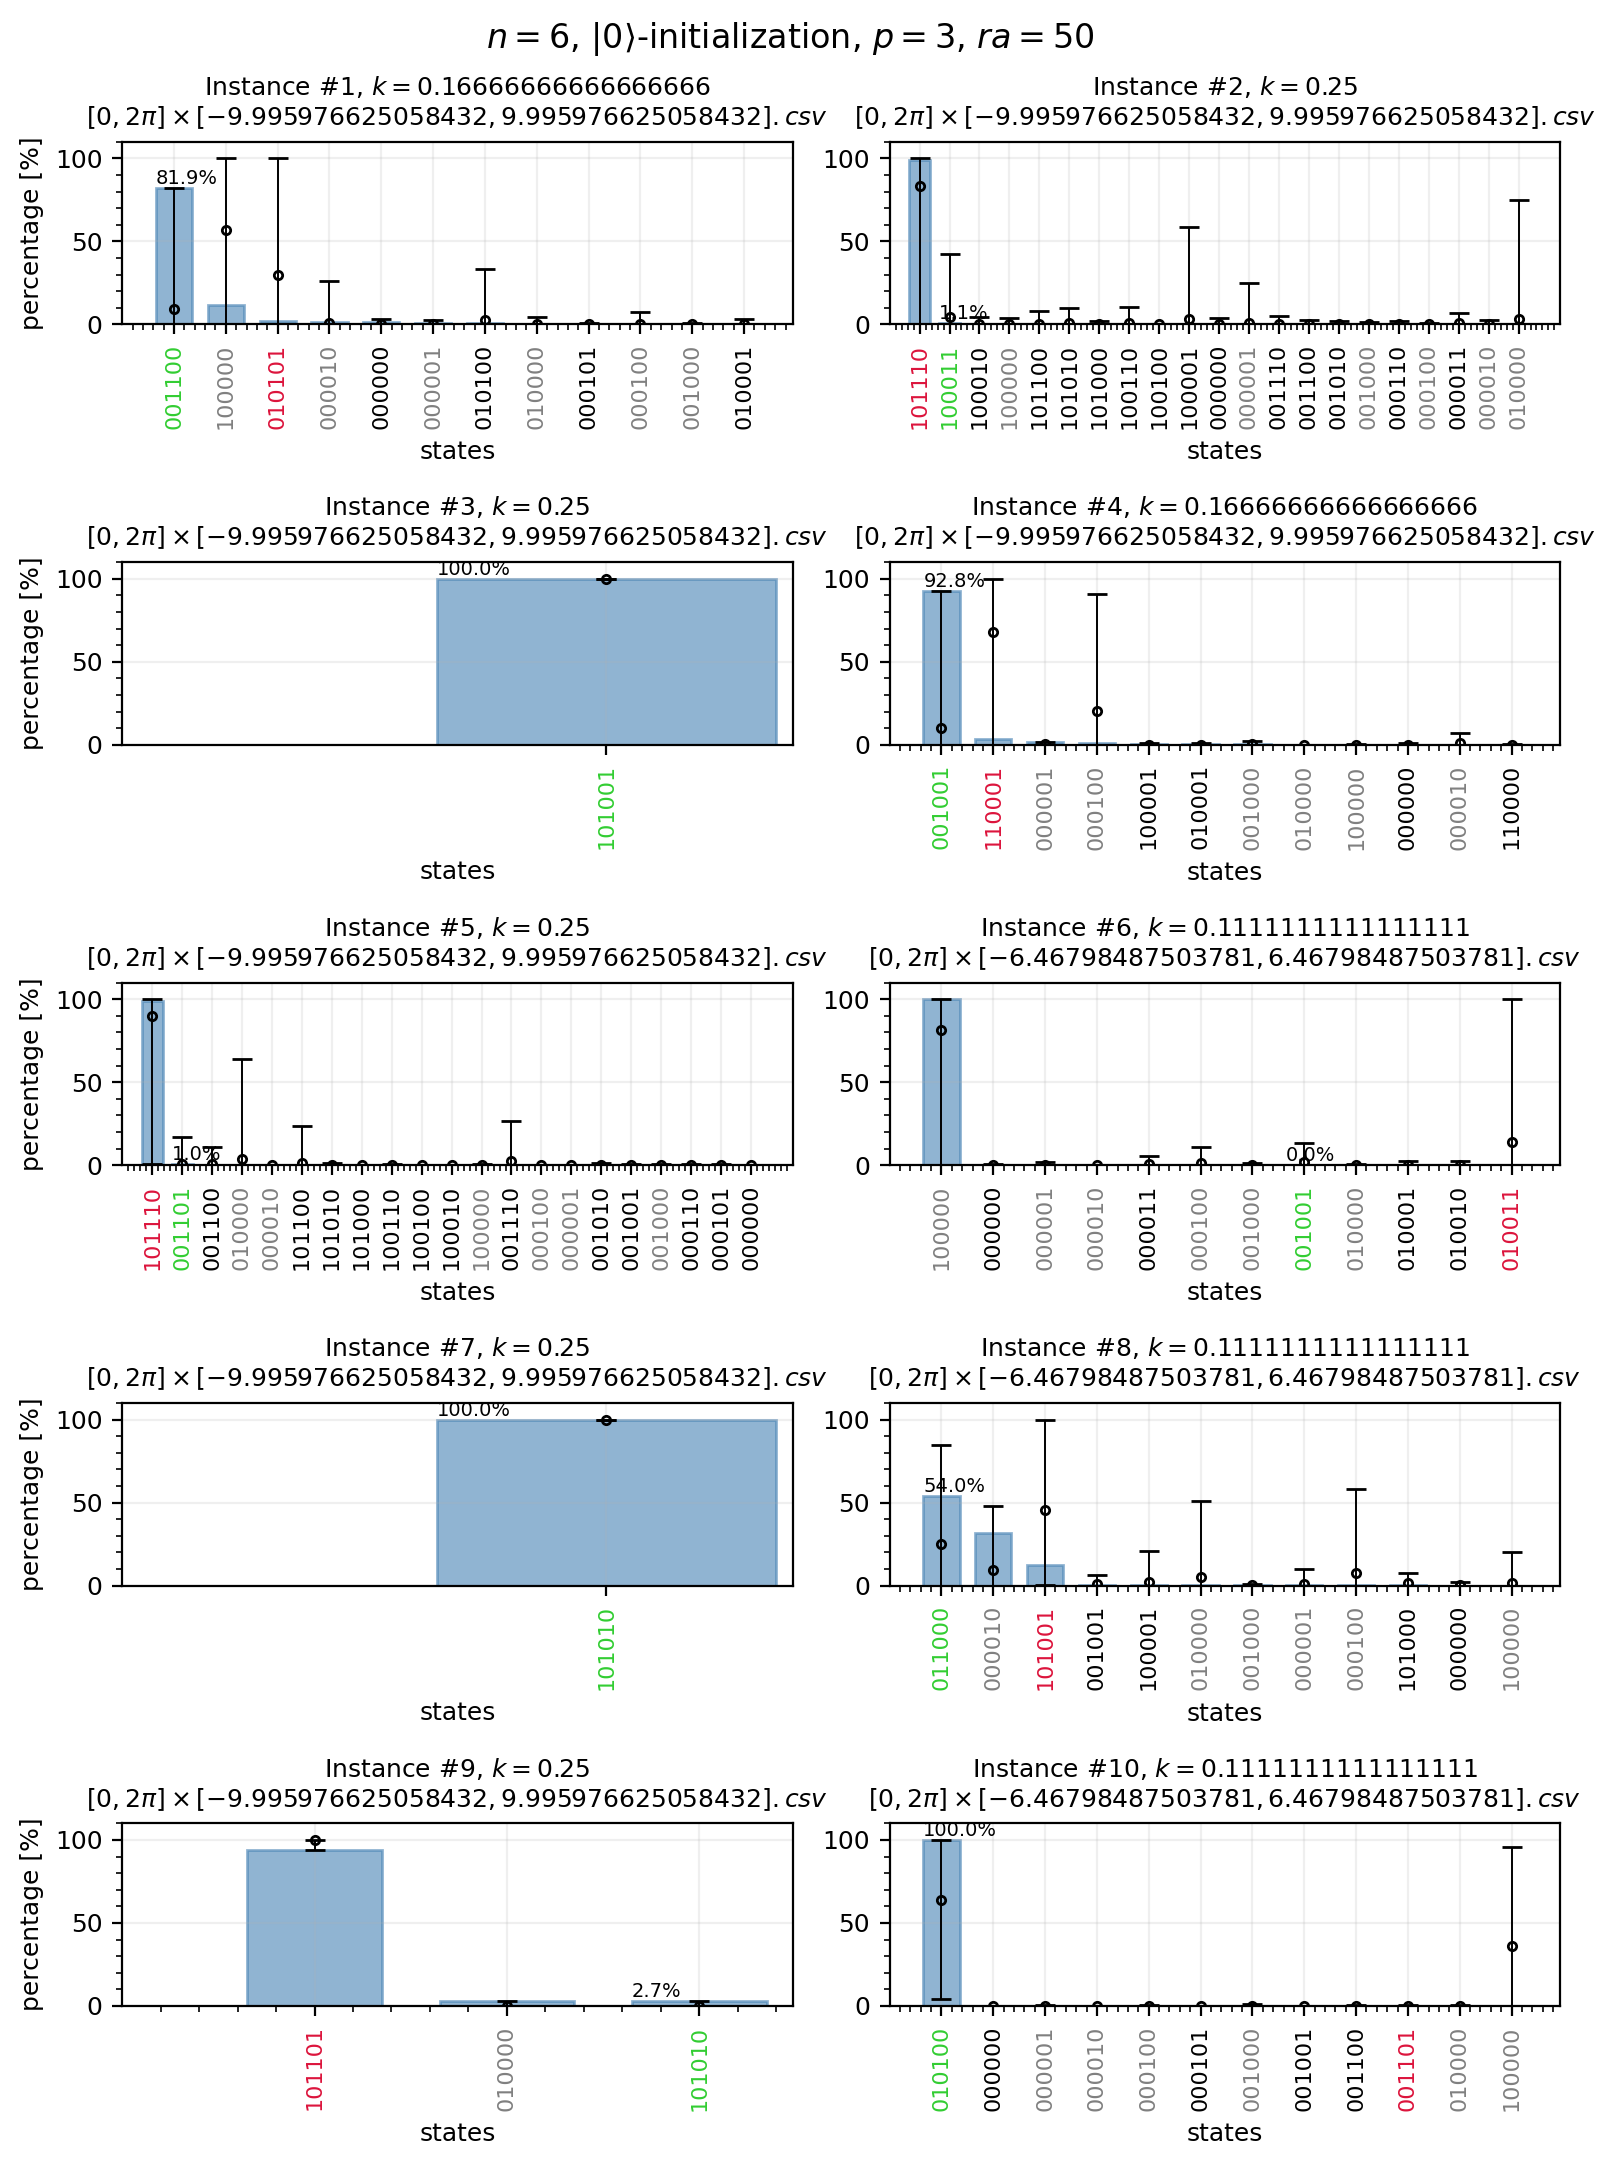

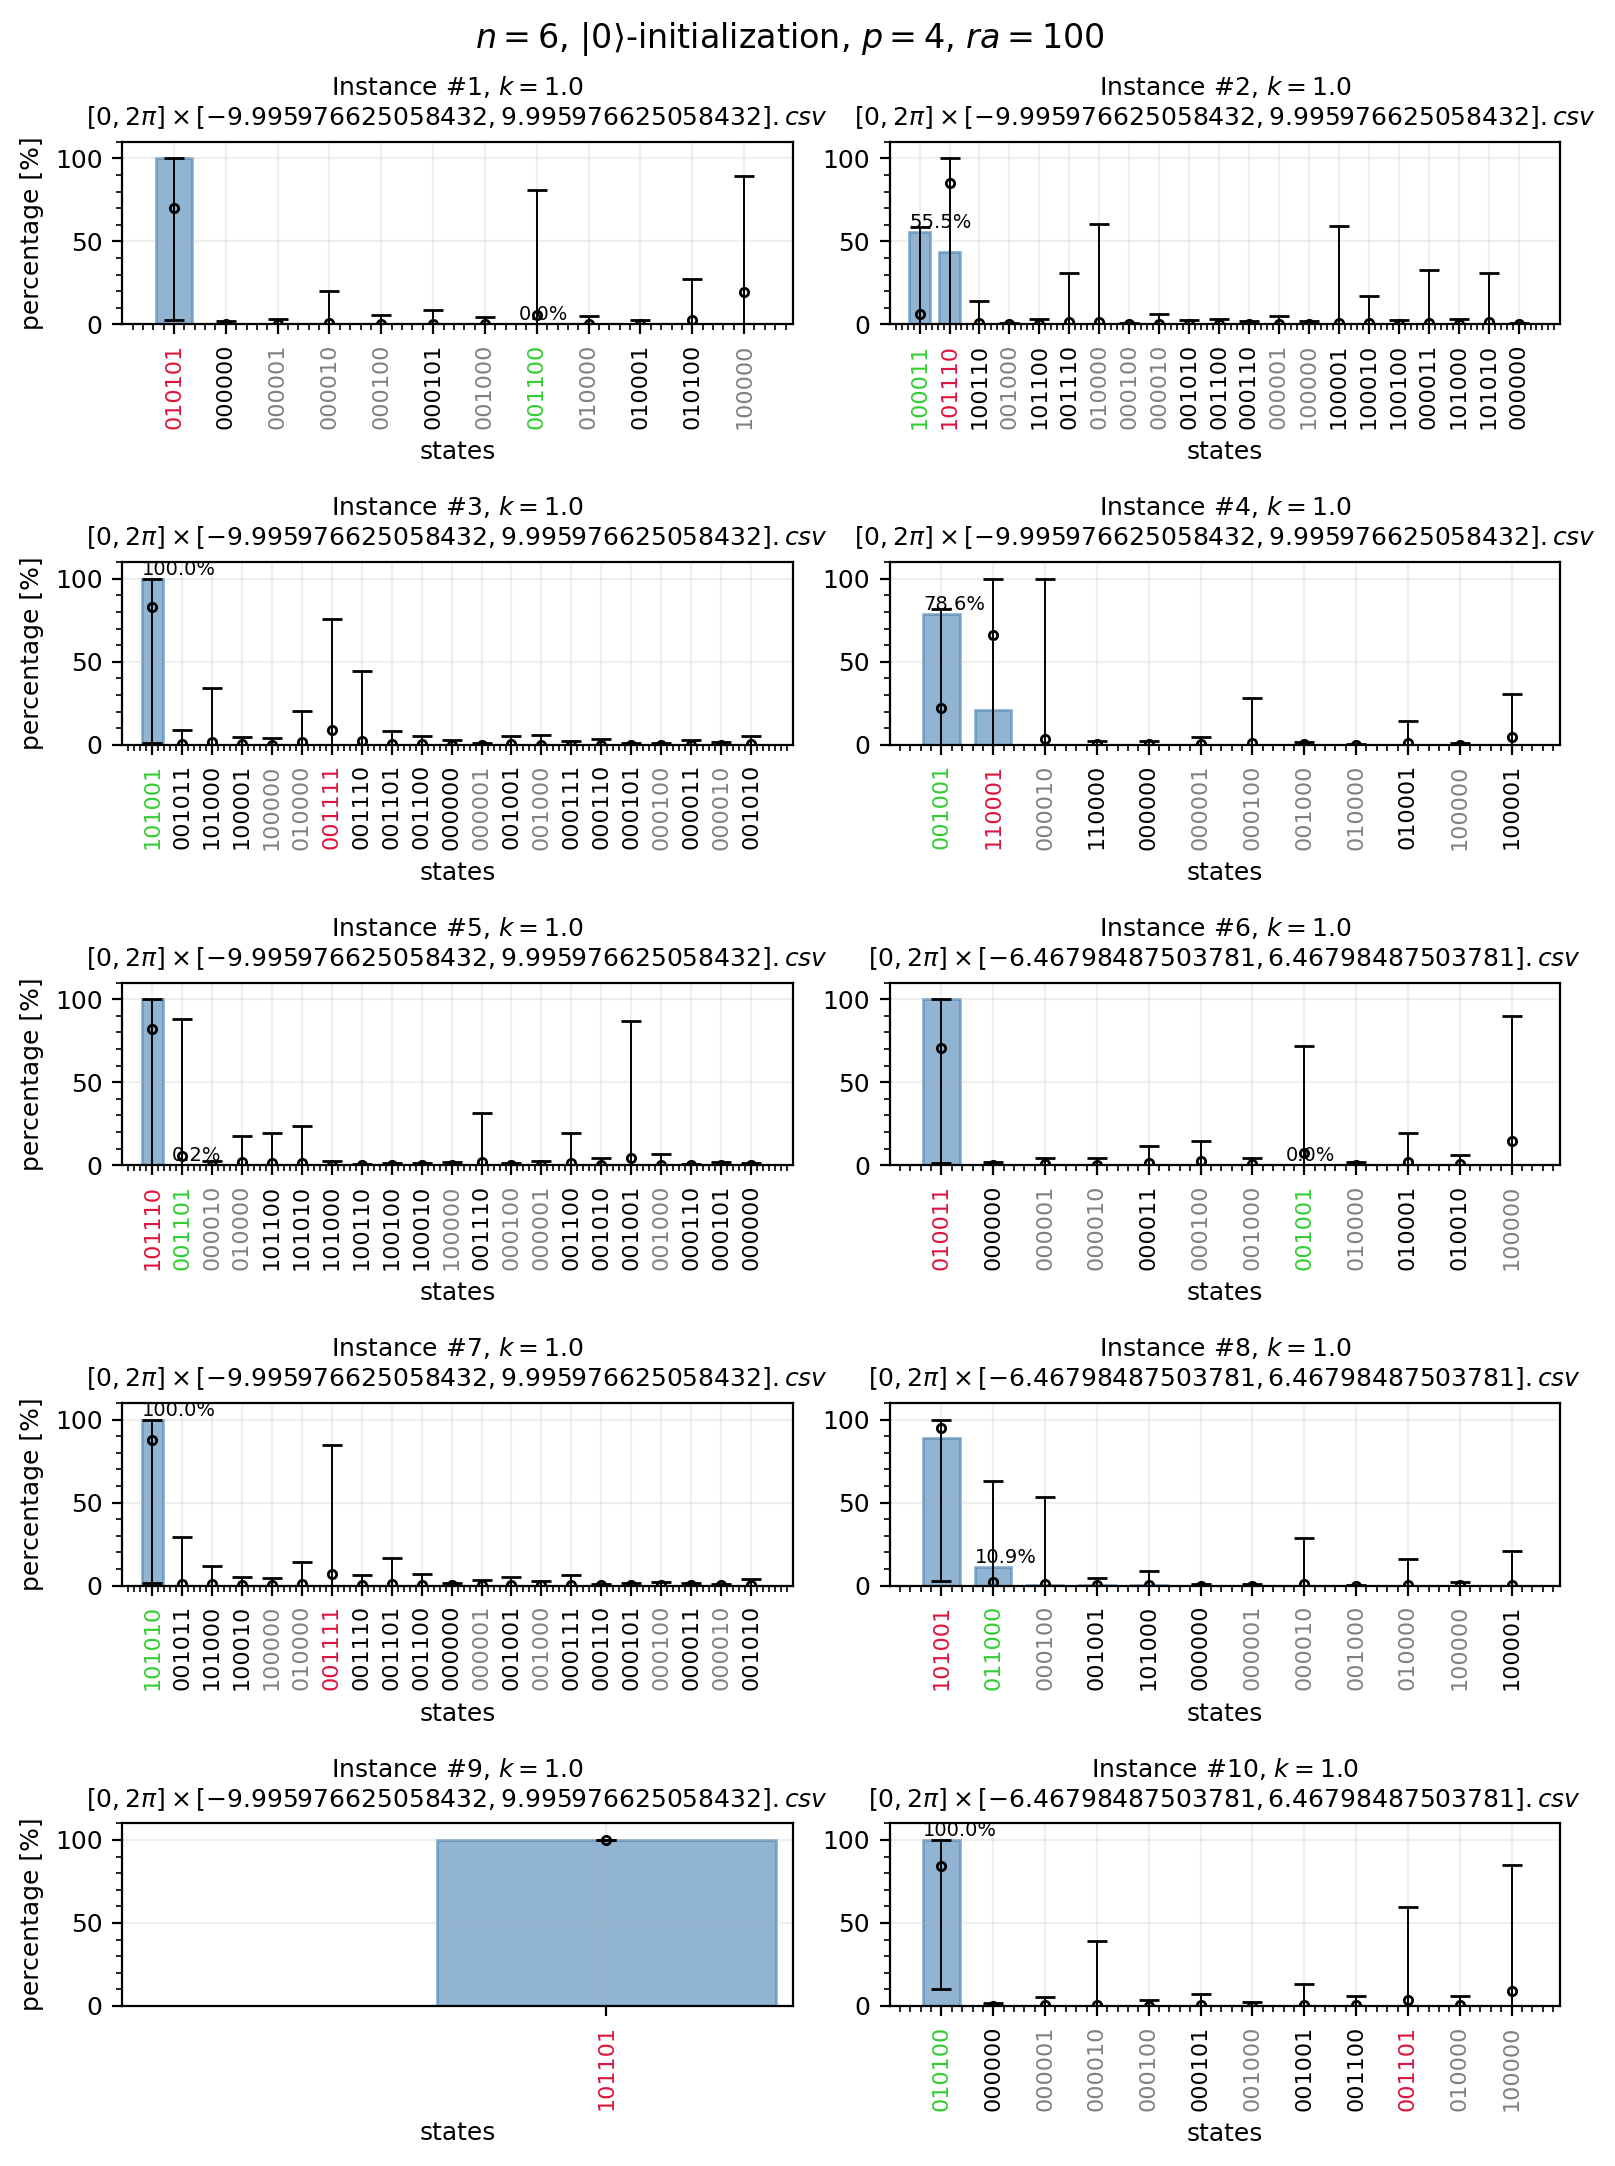

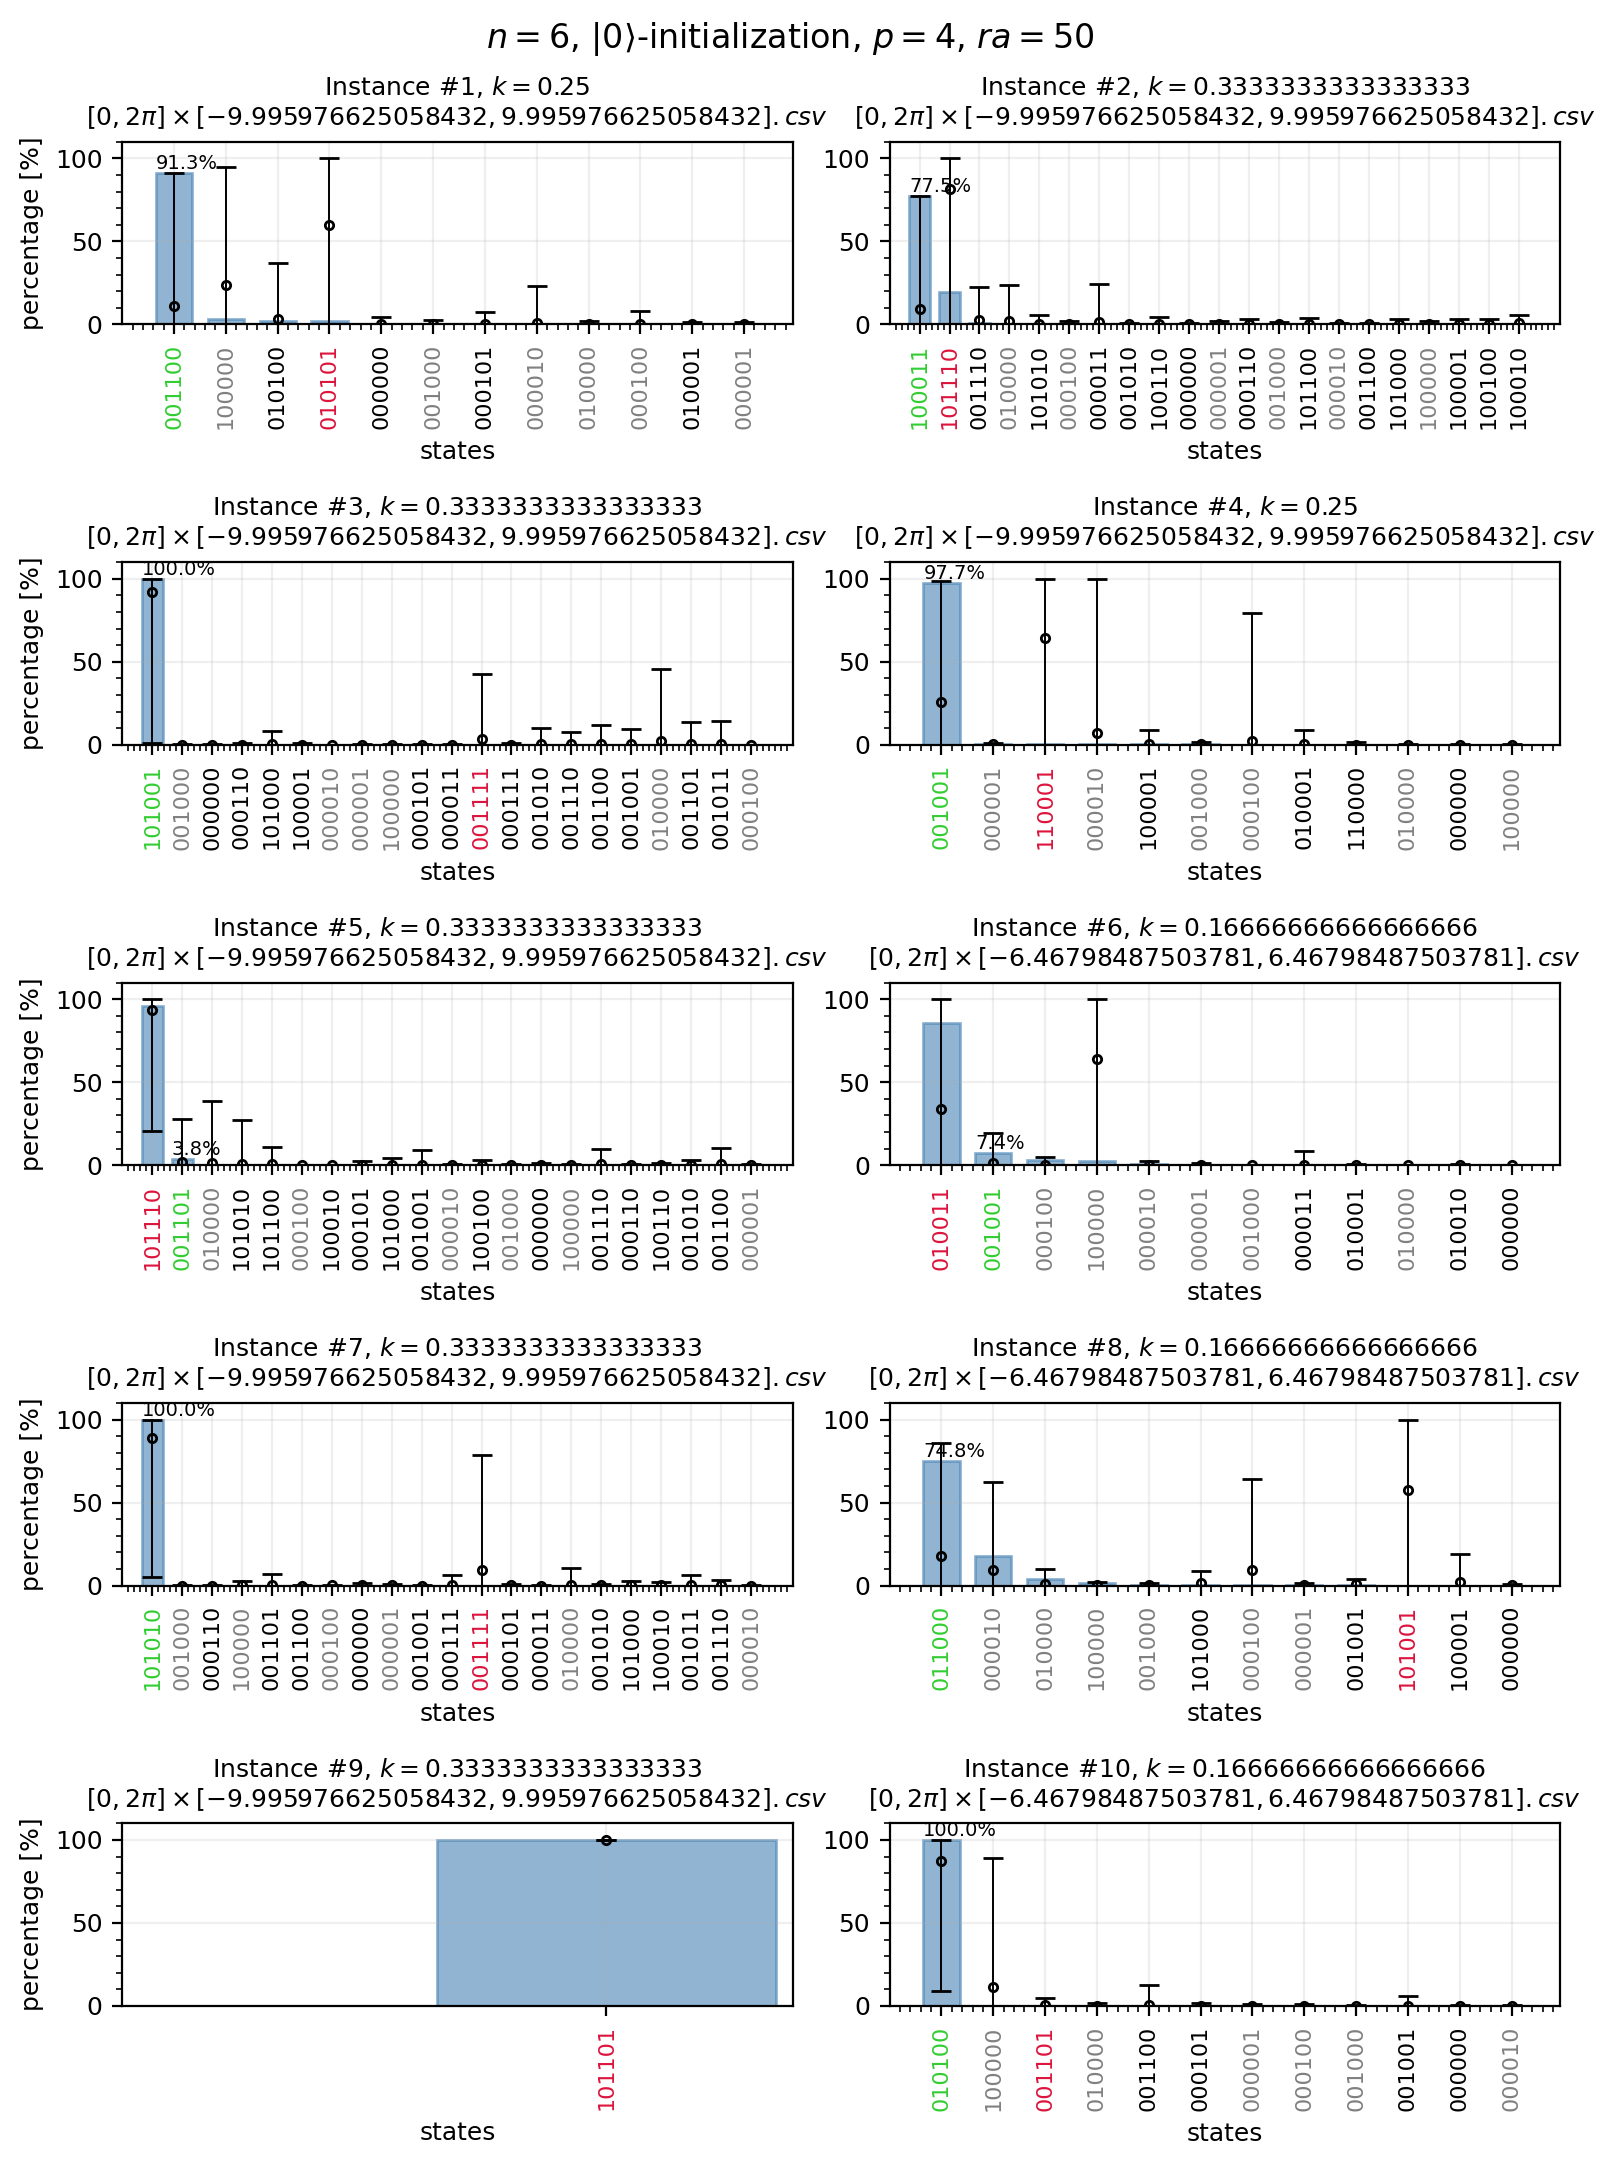

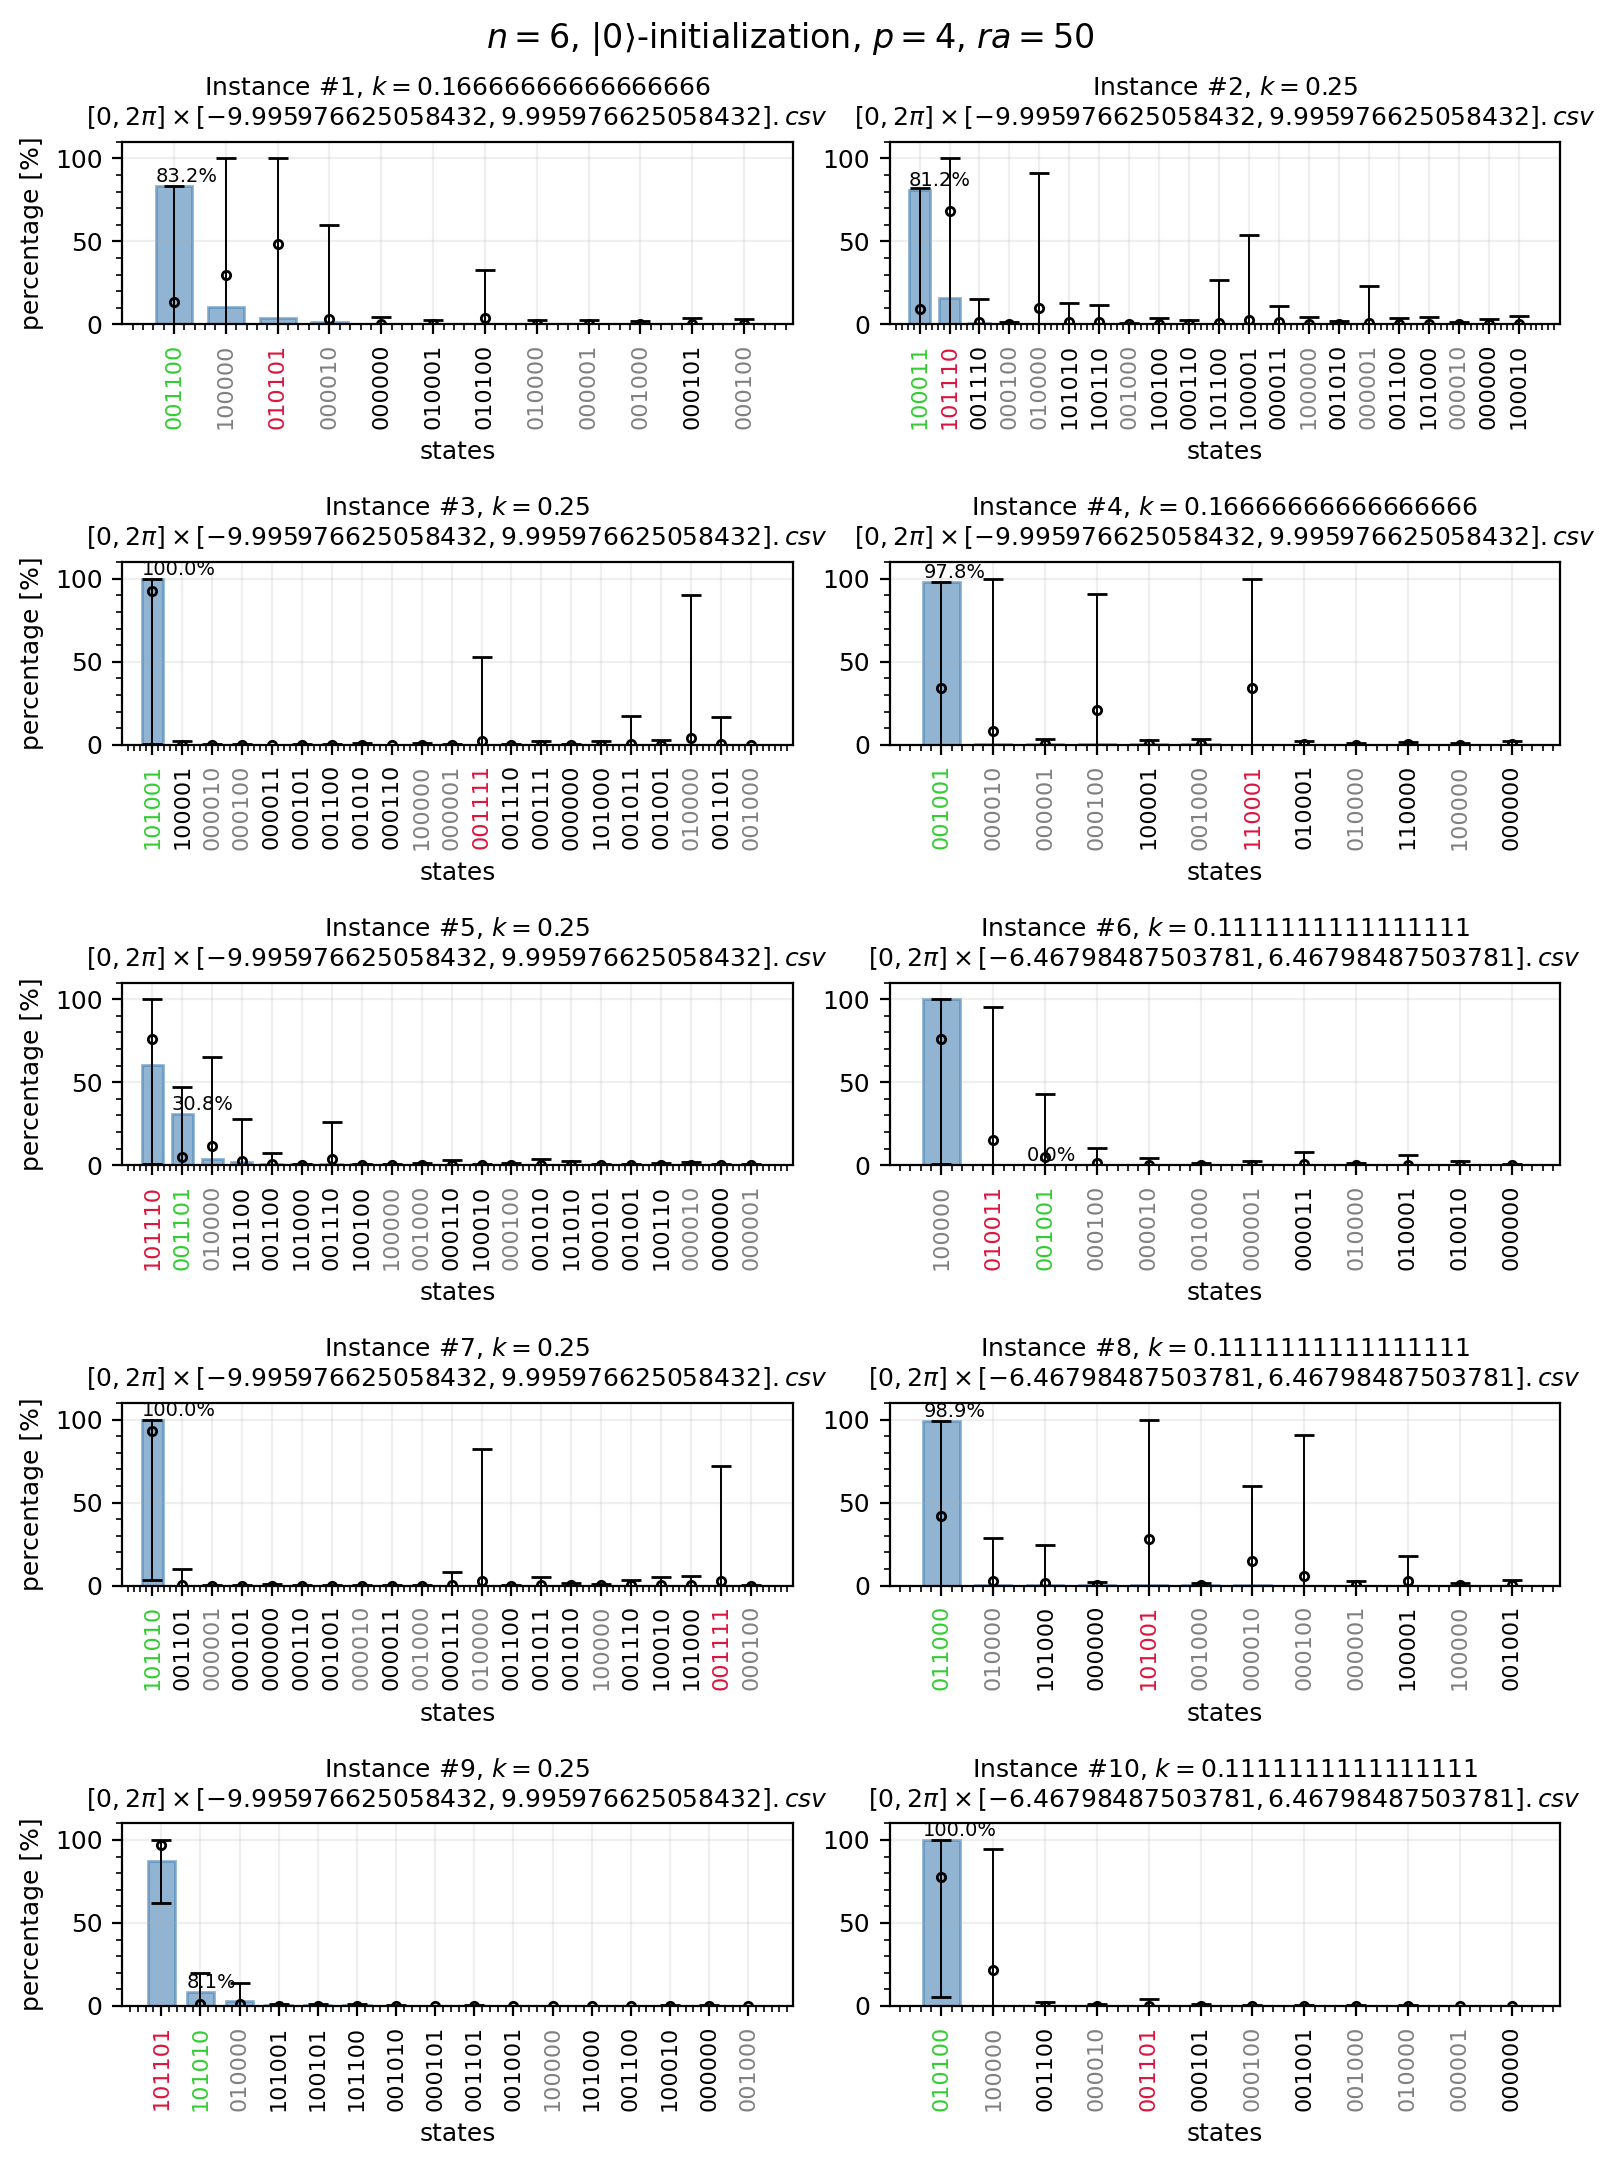

In [4]:
for folder in folder_list_random:
    # Find the files that contain every string in 'substrings'.
    FILENAME_list, DATA_FILENAME_list = find_files_containing_string(path= f"./{folder}/")

    # Get the number of files collected.
    num_files = len(FILENAME_list)

    if num_files>1:
        plot_list_of_files(FILENAME_list, DATA_FILENAME_list,
                           colorchosen="steelblue", alpha=0.6,
                           init_name="all1",
                           dont_show_in_title=["i", "k"],
                           dont_show_in_titles=["n", "p", "ra", "init"],
                           figsize=(8,num_files+1),
                           dpi=200, N=9) # figsize=(10, 13), dpi=300, N=12 for latex figures
    else:
        plot_file(FILENAME_list[0], DATA_FILENAME_list[0],
                  colorchosen='indigo', alpha=0.4,
                  dont_show_in_title = [],
                  figsize=(10,4), dpi=200, N=10)

Estraggo la success probability da ogni istanza, per ogni setting (k=1, kLEC, kLEC-1)

In [5]:
# ********** Random **********
mec_mean_vec = []
mec_percentages_LEC = []
mec_percentages_LEC_1 = []

for folder, label in zip(folder_list_random, labels):
    print("label", label)
    files, data = find_files_containing_string(path= f"./{folder}/")
    mec_percentages, mec_mean = build_vector_of_mec_percentages(files, data)
    mec_mean_vec.append(mec_mean)
        
    if "LEC" in label:
        if "-1" in label:
            mec_percentages_LEC_1.append(mec_percentages)
        else:
            mec_percentages_LEC.append(mec_percentages)
        
    print(f"♦ {label} ♦")
    print(f"   folder '{folder}':\n   mec_percentages = {mec_percentages} %, \n   mean: {mec_mean} %")
    
print("\nmec_mean_perc_vec = ", mec_mean_vec)
print("mec_percentages_LEC = ", mec_percentages_LEC)
print("mec_percentages_LEC_1 = ", mec_percentages_LEC_1)

label p=3 k=1
♦ p=3 k=1 ♦
   folder 'random_parameters_2025-09-12@14h56m00s':
   mec_percentages = [0.0, 0.0, 100.0, 1.7578125, 0.0, 0.0, 100.0, 0.0, 0, 100.0] %, 
   mean: 30.17578125 %
label p=3 LEC
♦ p=3 LEC ♦
   folder 'random_parameters_2025-09-12@12h30m08s':
   mec_percentages = [82.12890625, 0.0, 100.0, 89.6484375, 0.0, 0.0, 100.0, 82.71484375, 0, 100.0] %, 
   mean: 55.44921875 %
label p=3 LEC-1
♦ p=3 LEC-1 ♦
   folder 'random_parameters_2025-09-12@13h44m51s':
   mec_percentages = [81.93359375, 1.07421875, 100.0, 92.7734375, 0.9765625, 0.0, 100.0, 54.00390625, 2.734375, 100.0] %, 
   mean: 53.349609375 %
label p=4 k=1
♦ p=4 k=1 ♦
   folder 'random_parameters_2025-09-16@08h28m21s':
   mec_percentages = [0.0, 55.46875, 100.0, 78.61328125, 0.1953125, 0.0, 100.0, 10.9375, 0, 100.0] %, 
   mean: 44.521484375 %
label p=4 LEC
♦ p=4 LEC ♦
   folder 'random_parameters_2025-09-10@18h01m06s':
   mec_percentages = [91.30859375, 77.5390625, 100.0, 97.65625, 3.80859375, 7.421875, 100.0, 74.8

In [6]:
best_succ_probs_between_LEC_and_LEC_1 = find_best_succ_probs_between_LEC_and_LEC_1(mec_percentages_LEC, 
                                                                                   mec_percentages_LEC_1)

The best for label = p=3, instance = 0 is max_prob = 82.12890625 %
The best for label = p=3, instance = 1 is max_prob = 1.07421875 %
The best for label = p=3, instance = 2 is max_prob = 100.0 %
The best for label = p=3, instance = 3 is max_prob = 92.7734375 %
The best for label = p=3, instance = 4 is max_prob = 0.9765625 %
The best for label = p=3, instance = 5 is max_prob = 0.0 %
The best for label = p=3, instance = 6 is max_prob = 100.0 %
The best for label = p=3, instance = 7 is max_prob = 82.71484375 %
The best for label = p=3, instance = 8 is max_prob = 2.734375 %
The best for label = p=3, instance = 9 is max_prob = 100.0 %
The best for label = p=4, instance = 0 is max_prob = 91.30859375 %
The best for label = p=4, instance = 1 is max_prob = 81.15234375 %
The best for label = p=4, instance = 2 is max_prob = 100.0 %
The best for label = p=4, instance = 3 is max_prob = 97.75390625 %
The best for label = p=4, instance = 4 is max_prob = 30.76171875 %
The best for label = p=4, instance

In [7]:
p3 = best_succ_probs_between_LEC_and_LEC_1["p=3"]
p4 = best_succ_probs_between_LEC_and_LEC_1["p=4"]
mean_p4 = np.mean(p4)
mean_p3 = np.mean(p3)
print("The Mean (over the instances) Best Success Probability for p=3 is", mean_p3)
print("The Mean (over the instances) Best Success Probability for p=4 is", mean_p4)

The Mean (over the instances) Best Success Probability for p=3 is 56.240234375
The Mean (over the instances) Best Success Probability for p=4 is 71.54296875


### Mean success probability for different k settings.

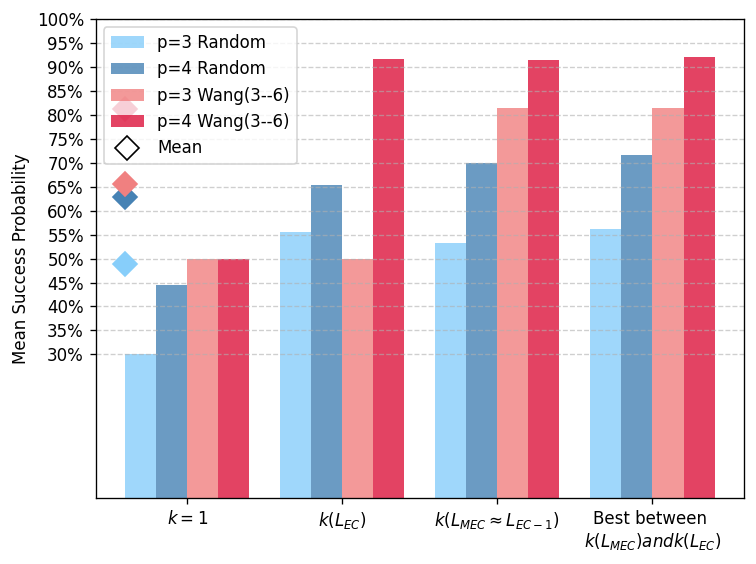

In [14]:
#Wang
#The Mean (over the instances) Best Success Probability for p=3 is 81.3232421875
#The Mean (over the instances) Best Success Probability for p=4 is 91.9921875

#Random
# The Mean (over the instances) Best Success Probability for p=3 is 56.240234375
# The Mean (over the instances) Best Success Probability for p=4 is 71.54296875

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # per creare elementi personalizzati nella legenda

# Dati
p3_random = [30.17578125, 55.44921875, 53.349609375, 56.240234375]
p4_random = [44.521484375, 65.25390625, 69.990234375, 71.54296875]

p3_wang = [50.0, 50.0, 81.3232421875, 81.3232421875]
p4_wang = [50.0, 91.552734375, 91.455078125, 91.9921875]

labels = ["$k=1$", "$k(L_{EC})$", "$k(L_{MEC} \\approx L_{EC-1})$", "Best between \n$k(L_{MEC}) and k(L_{EC})$"]
x = np.arange(len(labels))
width = 0.2

plt.figure(dpi=120)
colors = ['lightskyblue', 'steelblue', 'lightcoral', 'crimson', "black"]

# Barre
plt.bar(x - width*1.5, p3_random, width, color=colors[0], label='p=3 Random', alpha=0.8)
plt.bar(x - width*0.5, p4_random, width, color=colors[1], label='p=4 Random', alpha=0.8)
plt.bar(x + width*0.5, p3_wang, width, color=colors[2], label='p=3 Wang(3--6)', alpha=0.8)
plt.bar(x + width*1.5, p4_wang, width, color=colors[3], label='p=4 Wang(3--6)', alpha=0.8)

# Media come diamante a sinistra (senza numero)
for vals, color in zip([p3_random, p4_random, p3_wang, p4_wang], colors):
    mean_val = np.mean(vals)
    x_pos = x[0] - 2*width  # a sinistra del primo gruppo di barre
    plt.plot(x_pos, mean_val, marker='D', markersize=10, color=color)

# Griglia più fitta ogni 5%
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.yticks(np.arange(30, 101, 5), [f"{x}%" for x in range(30, 101, 5)])

# Personalizzazione asse x
plt.xticks(x, labels)
plt.ylabel("Mean Success Probability")

# Legenda personalizzata con rombo non colorato per "Mean"
mean_legend = Line2D([0], [0], marker='D', color='w', markerfacecolor='none',
                     markeredgecolor='black', markersize=10, label='Mean')
plt.legend(handles=plt.gca().get_legend_handles_labels()[0] + [mean_legend])

plt.tight_layout()
plt.show()

